In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
%matplotlib notebook

In [3]:
# df_cg1d = pd.read_csv('beam_flux_cg1d.txt', sep='\t', header=None, skiprows=1)
# df_snap = pd.read_csv('beam_flux_snap.txt', sep='\t', header=None, skiprows=1)
df_venus = pd.read_csv('beam_flux_venus.txt', sep='\t', header=None, skiprows=1)
df_trans = pd.read_csv('trans_venus_25m_60hz_3_5A.txt', sep='\t', header=None, skiprows=1)

In [35]:
print(df_trans.head())
print(df_trans.tail())
print(df_venus.head())
print(df_venus.tail())

      0             1
0  0.45  1.780000e-07
1  0.50  3.160000e-08
2  0.55  5.620000e-09
3  0.60  1.000000e-09
4  0.65  1.880000e-10
         0    1
887  44.80  0.0
888  44.85  0.0
889  44.90  0.0
890  44.95  0.0
891  45.00  0.0
       0           1
0  0.086  17091571.2
1  0.091  16583548.8
2  0.099  16352582.4
3  0.111  17028288.0
4  0.124  17548876.8
        0         1
71  7.608  949478.4
72  8.062  851347.2
73  8.537  737596.8
74  9.037  607286.4
75  9.580  551808.0


In [45]:
new_x = np.linspace(min(df_venus[0]), max(df_venus[0]), (max(df_venus[0])-min(df_venus[0]))/0.001+1)
print(new_x)

[0.086 0.087 0.088 ... 9.578 9.579 9.58 ]


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [46]:
interp_type = 'cubic'
interp_flux_function = interp1d(x=df_venus[0], y=df_venus[1], kind=interp_type)

In [48]:
new_y = interp_flux_function(new_x)
df_flux = pd.DataFrame()
df_flux[0] = new_x
df_flux[1] = new_y

In [95]:
# band_min = 2.45
# band_max = 4.9
band_min = 0.064
# band_max = 0.645
band_max = 0.286
# band_min = 0
# band_max = 10
df_band = df_flux[:]
df_band = df_band[df_flux[0]<=band_max]
df_band = df_band[df_flux[0]>=band_min]

/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [96]:
print(df_band.head())
print(df_band.tail())

       0             1
0  0.086  1.709157e+07
1  0.087  1.696743e+07
2  0.088  1.685457e+07
3  0.089  1.675299e+07
4  0.090  1.666265e+07
         0             1
195  0.281  1.626204e+07
196  0.282  1.627809e+07
197  0.283  1.629584e+07
198  0.284  1.631493e+07
199  0.285  1.633499e+07


<IPython.core.display.Javascript object>


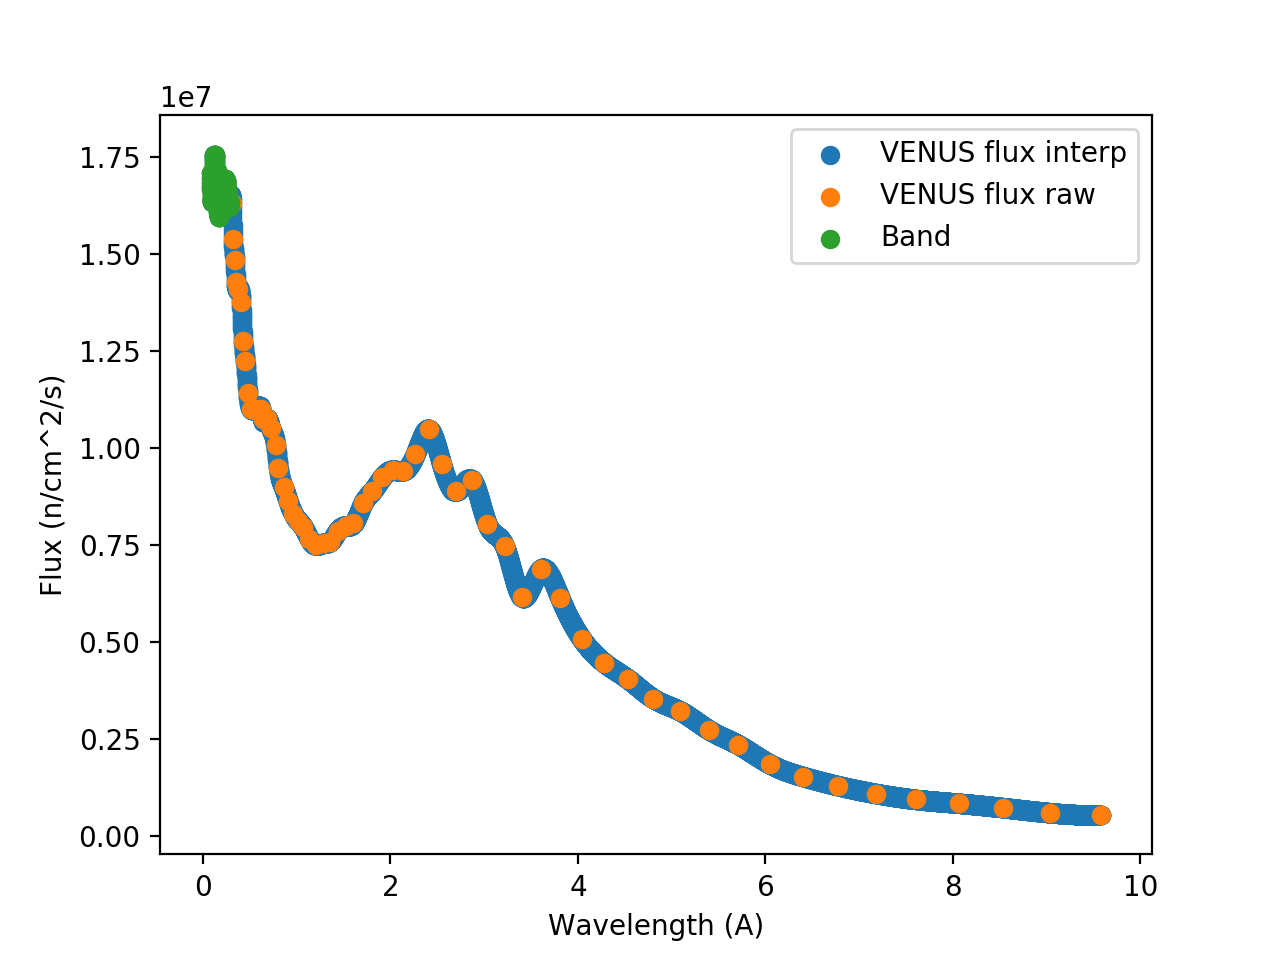

In [97]:
plt.figure(0)
plt.scatter(x=df_flux[0], y=df_flux[1], label='VENUS flux interp')
plt.scatter(x=df_venus[0], y=df_venus[1], label='VENUS flux raw')
plt.scatter(x=df_band[0], y=df_band[1], label='Band')
plt.legend(loc='best')
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux (n/cm^2/s)')
plt.show()

In [98]:
integr = np.trapz(y=df_band[1], x=df_band[0], dx=0.00001).round(3)
print('Flux(band {}-{}): {} (n/s/cm^2)'.format(min(df_band[0]), max(df_band[0]), integr))

Flux(band 0.086-0.28500000000000003): 3315211.342 (n/s/cm^2)


In [94]:
trans_x = [0.017, 0.020, 0.029, 0.064, 0.286, 0.640, 0.648]
trans_y = [0.016, 0.022, 0.035, 0.09, 0.438, 0.991, 1]

In [99]:
interp_trans_function = interp1d(x=trans_x, y=trans_y, kind=interp_type)
trans_y_new = interp_trans_function(df_band[0])

In [103]:
df = pd.DataFrame()
df[0] = df_band[0]
df[1] = df_band[1] * trans_y_new

In [106]:
print(df_band.head())
print(df.head())
print(df_band.tail())
print(df.tail())

       0             1
0  0.086  1.709157e+07
1  0.087  1.696743e+07
2  0.088  1.685457e+07
3  0.089  1.675299e+07
4  0.090  1.666265e+07
       0             1
0  0.086  2.158879e+06
1  0.087  2.170801e+06
2  0.088  2.183749e+06
3  0.089  2.197777e+06
4  0.090  2.212939e+06
         0             1
195  0.281  1.626204e+07
196  0.282  1.627809e+07
197  0.283  1.629584e+07
198  0.284  1.631493e+07
199  0.285  1.633499e+07
         0             1
195  0.281  6.991956e+06
196  0.282  7.024990e+06
197  0.283  7.058838e+06
198  0.284  7.093354e+06
199  0.285  7.128388e+06


<IPython.core.display.Javascript object>


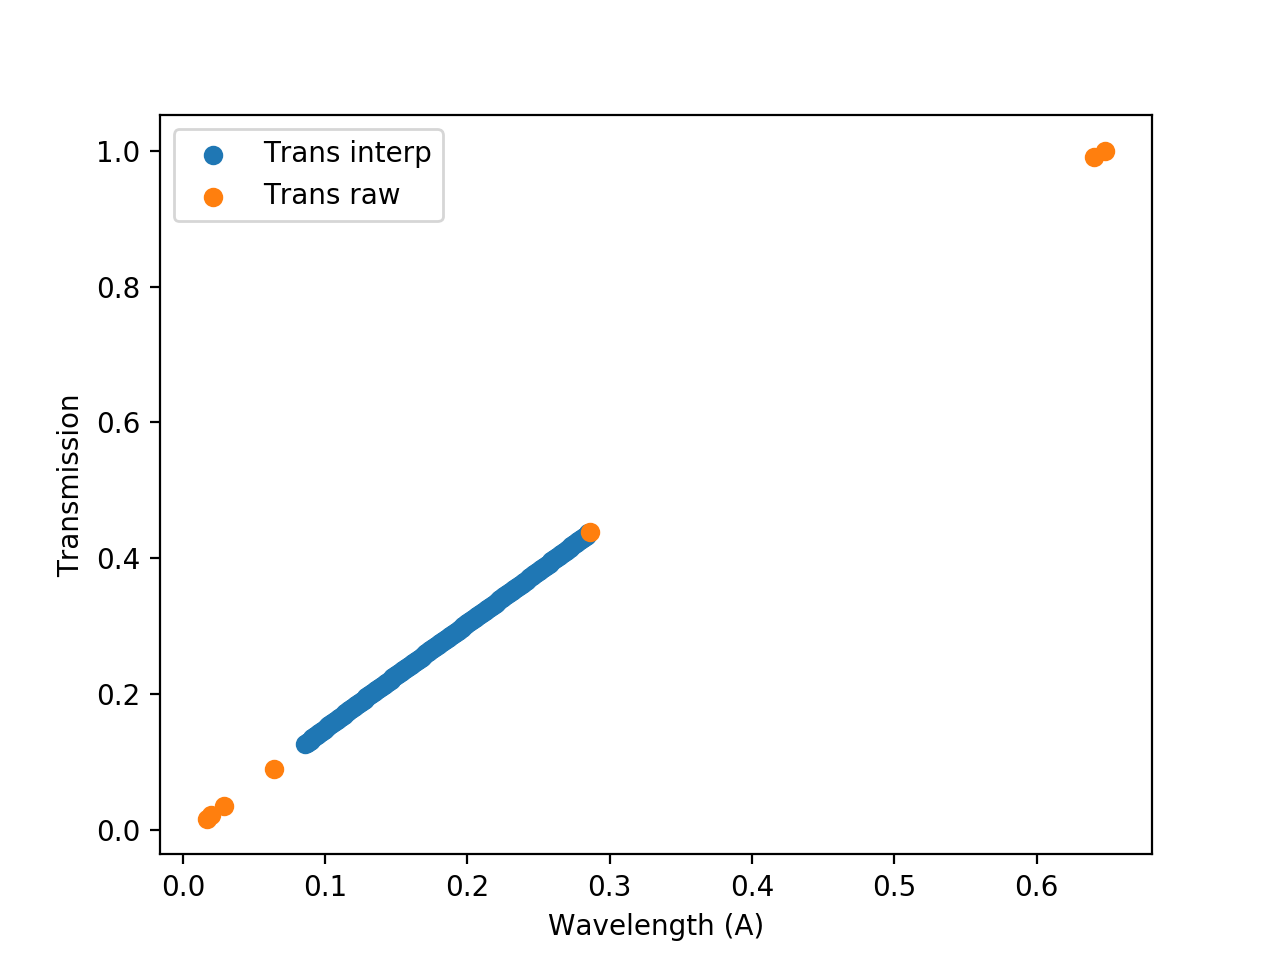

In [100]:
plt.figure(1)
plt.scatter(x=df_band[0], y=trans_y_new, label='Trans interp')
plt.scatter(x=trans_x, y=trans_y, label='Trans raw')
plt.legend(loc='best')
plt.xlabel('Wavelength (A)')
plt.ylabel('Transmission')
plt.show()

In [105]:
integr_trans = np.trapz(y=df[1], x=df[0], dx=0.00001).round(3)
print('Flux(band {}-{}): {} (n/s/cm^2)'.format(min(df[0]), max(df[0]), integr_trans))

Flux(band 0.086-0.28500000000000003): 930960.898 (n/s/cm^2)
